# Basic Epidemiology Models

In [1]:
using AlgebraicPetri
using AlgebraicPetri.Epidemiology

using Petri: Model, Graph
using OrdinaryDiffEq
using StochasticDiffEq
using Plots

using Catlab.Theories
using Catlab.CategoricalAlgebra.FreeDiagrams
using Catlab.Graphics

display_wd(ex) = to_graphviz(ex, orientation=LeftToRight, labels=true);

#### SIR Model:

define model

In [2]:
sir = transmission ⋅ recovery

compose(transmission,recovery)

get resulting petri net as a C-Set

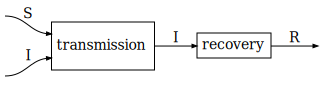

In [3]:
cset_sir = decoration(F_epi(sir));
display_wd(sir)

Use Petri.jl to visualize the C-Set

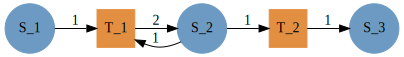

In [4]:
Graph(Model(cset_sir))

define initial states and transition rates, then
create, solve, and visualize ODE problem

In [5]:
u0 = [10.0, 1, 0];
p = [0.4, 0.4];

The C-Set representation has direct support for generating a DiffEq vector field

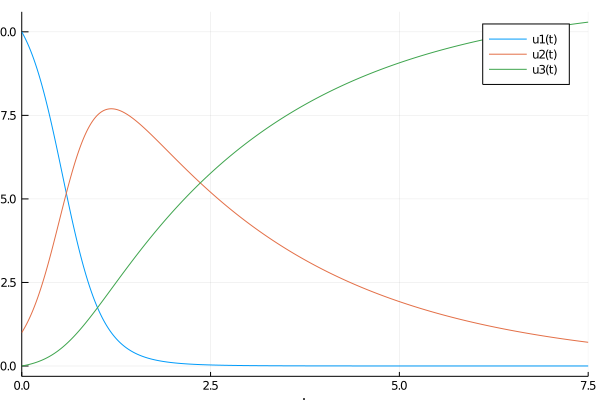

In [6]:
prob = ODEProblem(vectorfield(cset_sir),u0,(0.0,7.5),p);
sol = solve(prob,Tsit5())

plot(sol)

#### SEIR Model:

define model

In [7]:
sei = exposure ⋅ (illness ⊗ id(I)) ⋅ ∇(I)

seir = sei ⋅ recovery

compose(exposure,otimes(illness,id(I)),mmerge(I),recovery)

here we convert the C-Set decoration to a Petri.jl model
to use its StochasticDifferentialEquations support

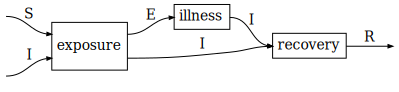

In [8]:
p_seir = Model(decoration(F_epi(seir)));

display_wd(seir)

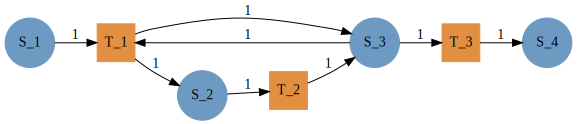

In [9]:
Graph(p_seir)

define initial states and transition rates, then
create, solve, and visualize ODE problem

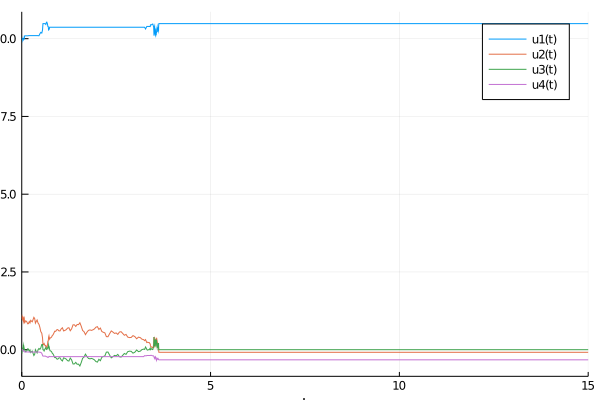

In [10]:
u0 = [10.0, 1, 0, 0];
p = [.9, .2, .5];

prob,cb = SDEProblem(p_seir,u0,(0.0,15.0),p);
sol = solve(prob,SRA1(),callback=cb)

plot(sol)

#### SEIRD Model:

define model

In [11]:
seird = sei ⋅ Δ(I) ⋅ (death ⊗ recovery)

compose(exposure,otimes(illness,id(I)),mmerge(I),mcopy(I),otimes(death,recovery))

get resulting petri net and visualize model

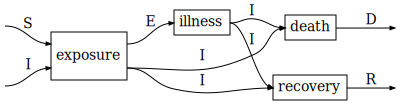

In [12]:
p_seird = Model(decoration(F_epi(seird)));

display_wd(seird)

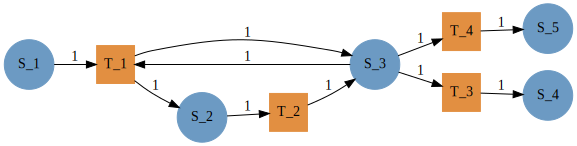

In [13]:
Graph(p_seird)

define initial states and transition rates, then
create, solve, and visualize ODE problem

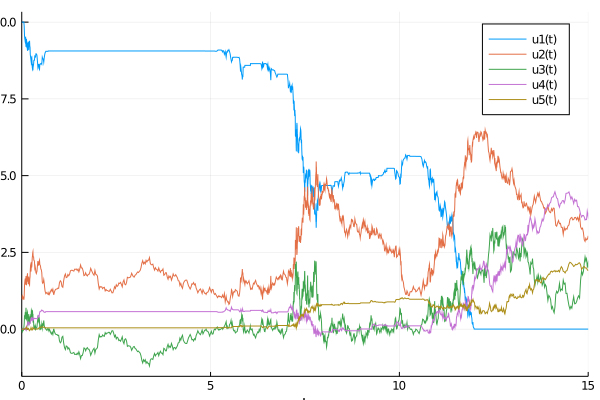

In [14]:
u0 = [10.0, 1, 0, 0, 0];
p = [0.9, 0.2, 0.5, 0.1];

prob,cb = SDEProblem(p_seird,u0,(0.0,15.0),p);
sol = solve(prob,SRA1(),callback=cb)

plot(sol)